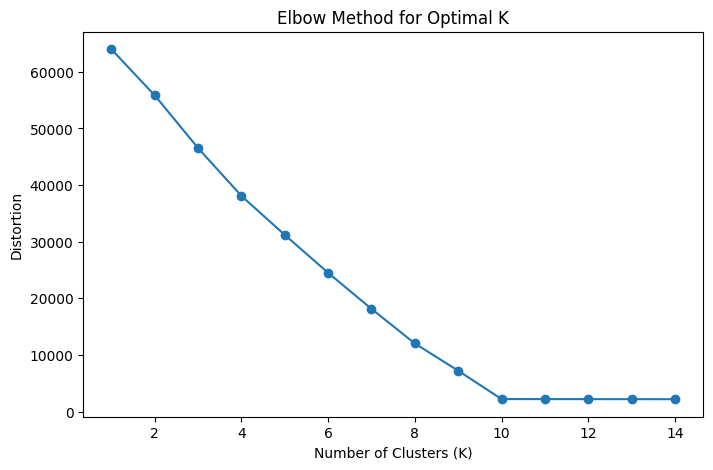

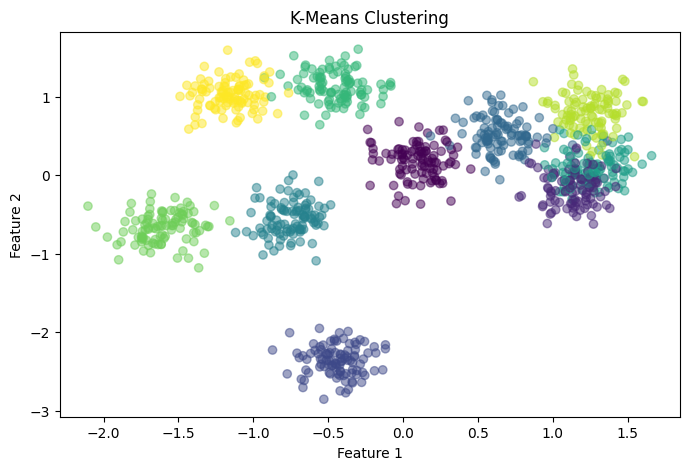

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset (Replace with real 64-D dataset)
X, _ = make_blobs(n_samples=1000, centers=10, n_features=64, random_state=42)
X = StandardScaler().fit_transform(X)  # Normalize data

# --- Question 1: K-Means Clustering ---
distortions = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Sum of squared distances

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Scatter plot of K-Means clusters (using first two features for visualization)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

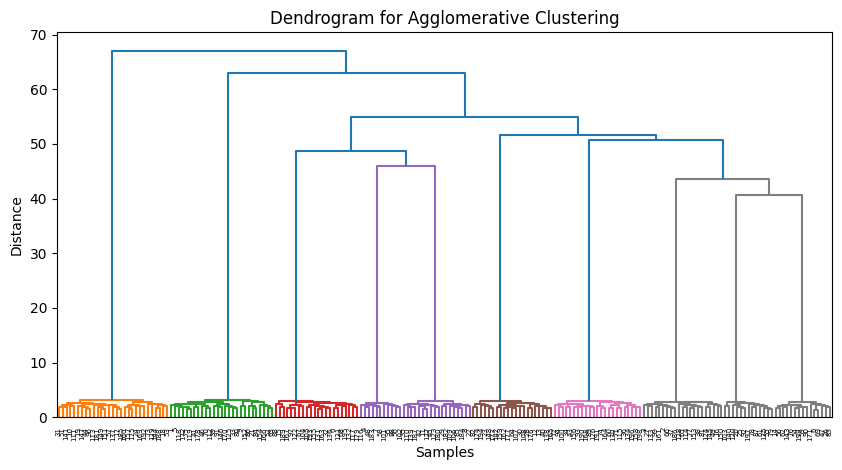

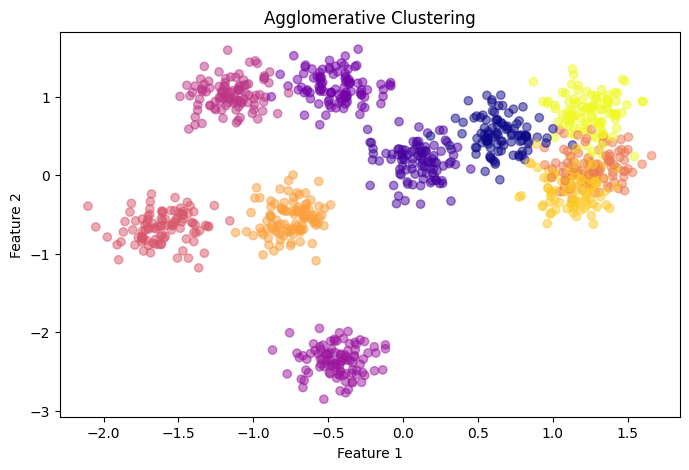

In [9]:
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(X[:200], method='ward')  # Using first 200 samples for visualization
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=10)
labels_agg = agg_clustering.fit_predict(X)

# Scatter plot of Agglomerative Clustering clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='plasma', alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

DBSCAN identified 0 clusters (excluding noise).


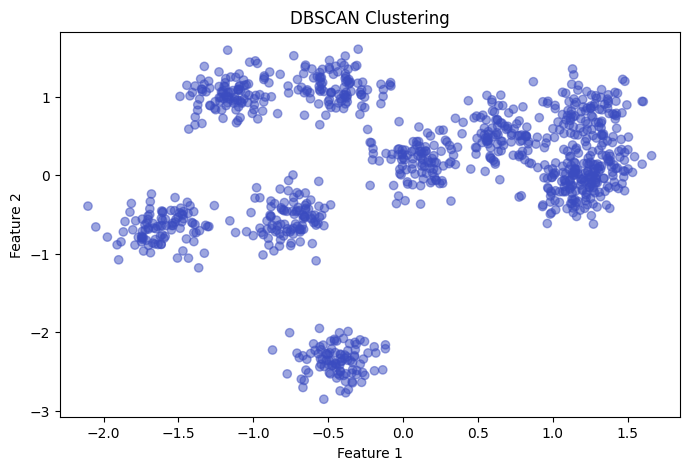

In [10]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

unique_labels = np.unique(labels_dbscan)
print(f"DBSCAN identified {len(unique_labels) - 1} clusters (excluding noise).")

# Scatter plot of DBSCAN clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='coolwarm', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

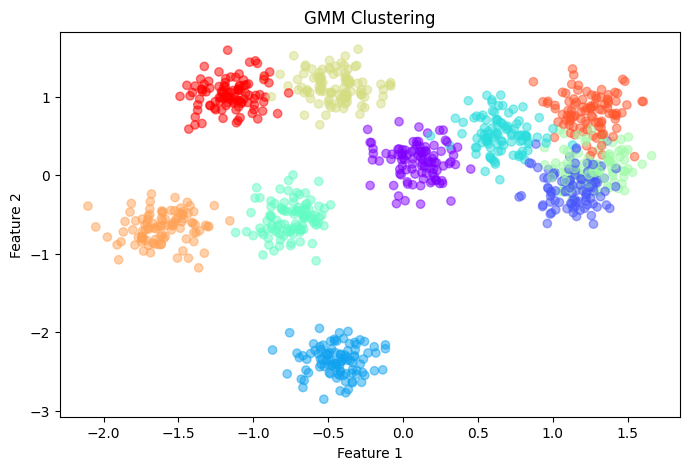

In [11]:
gmm = GaussianMixture(n_components=10, random_state=42)
labels_gmm = gmm.fit_predict(X)

# Scatter plot of GMM Clustering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='rainbow', alpha=0.5)
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()